# vechicle coupon recommendation

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [9]:
data=pd.read_csv('in-vehicle-coupon-recommendation[1].csv')

In [11]:
df=pd.DataFrame(data)

# Preprocessing and EDA

In [7]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [11]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [15]:
#get the number of rows and columns in the dataframe
df.shape

(12684, 26)

In [17]:
#get the name of the columns in the dataframe
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [19]:
#display the datatype of each column
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# checking missing values

In [21]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

 # found missing values and then it remove

In [23]:
df=df.fillna(0)

In [25]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# checking duplicates

In [27]:
df.duplicated().sum()

74

 remove duplicate

In [29]:
df = df.drop_duplicates()

In [31]:
df.duplicated().sum()

0

In [33]:
#drop unnecessary column
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

# label encoding

In [37]:
cat_cols = ['destination', 'passanger', 'weather',  'coupon', 'gender','maritalStatus', 'education']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,1,2,4,0,0,0,3,...,3,never,never,0,4~8,1~3,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,never,never,0,4~8,1~3,0,0,0,0
2,1,1,2,2,0,1,1,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,0
4,1,1,2,2,2,2,0,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  int64 
 1   passanger             12610 non-null  int64 
 2   weather               12610 non-null  int64 
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  int32 
 5   coupon                12610 non-null  int64 
 6   expiration            12610 non-null  int32 
 7   gender                12610 non-null  int64 
 8   age                   12610 non-null  int32 
 9   maritalStatus         12610 non-null  int64 
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  int64 
 12  occupation            12610 non-null  int32 
 13  income                12610 non-null  int32 
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [47]:
# Here we can analyze wheather our data id balanced or not
target_value_count=df['Y'].value_counts()

In [49]:
target_value_count

Y
1    7157
0    5453
Name: count, dtype: int64

This is slightly imbalanced which does not affect the model accuracy.

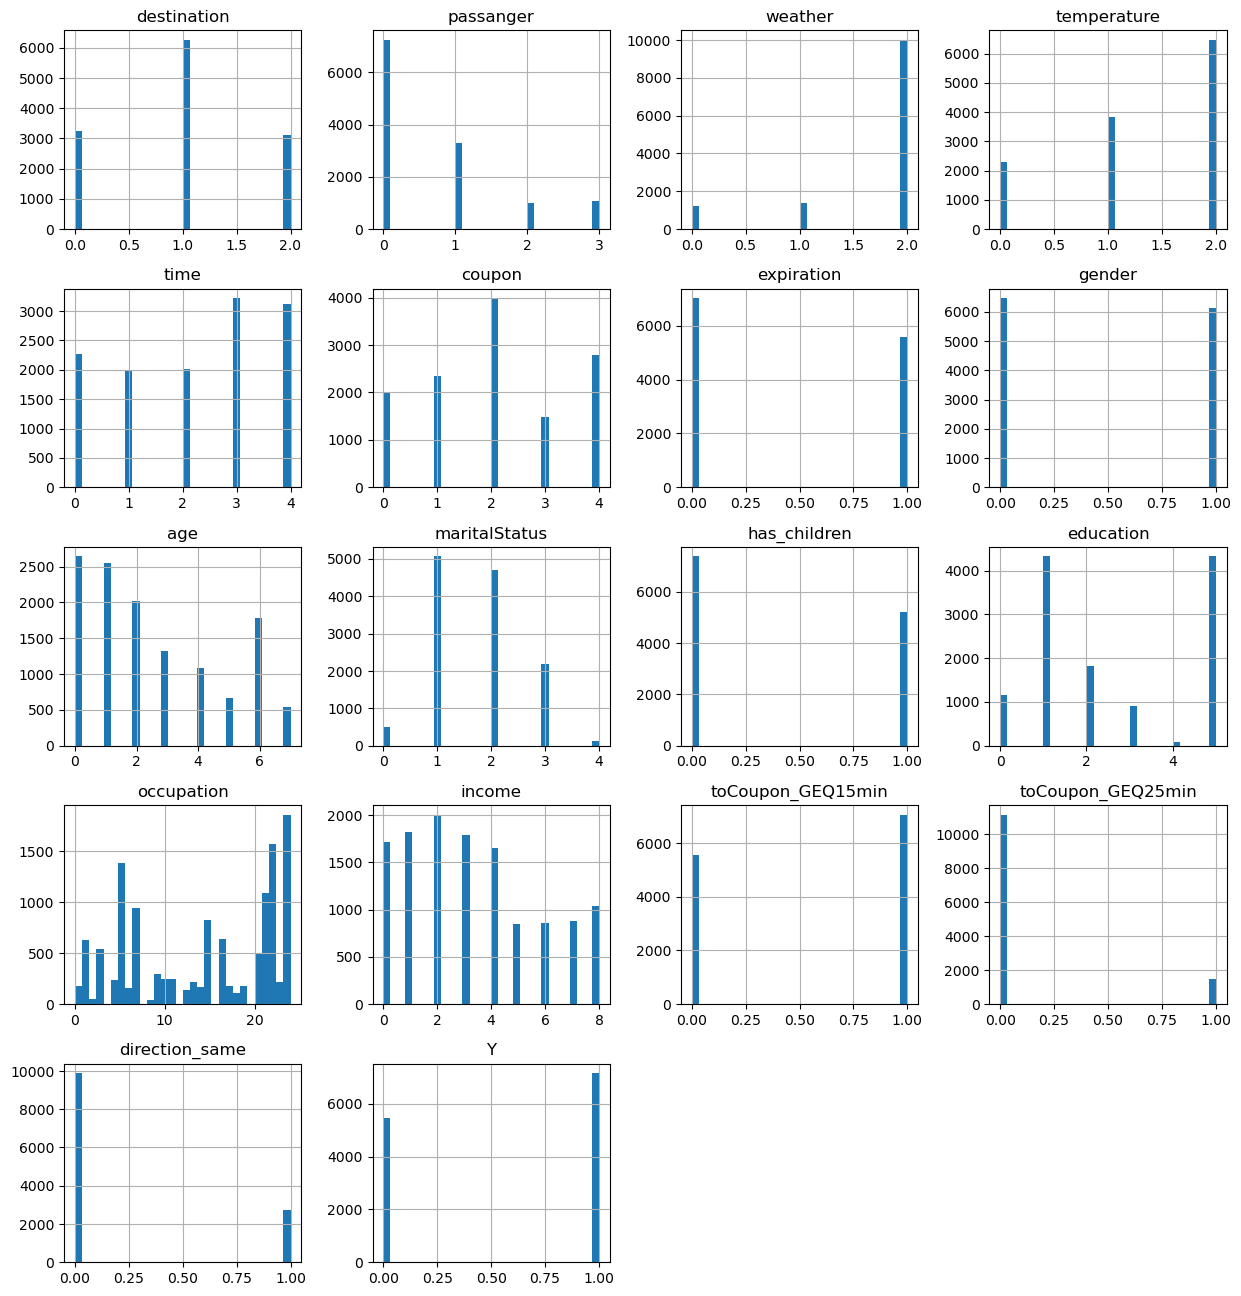

In [51]:
df.hist(figsize=(15, 16), bins=30)
plt.show()

In [53]:
numerical_features = df.select_dtypes(include = 'number')
print(numerical_features)

       destination  passanger  weather  temperature  time  coupon  expiration  \
0                1          0        2            1     2       4           0   
1                1          1        2            2     0       2           1   
2                1          1        2            2     0       1           1   
3                1          1        2            2     2       2           1   
4                1          1        2            2     2       2           0   
...            ...        ...      ...          ...   ...     ...         ...   
12679            0          3        0            1     3       1           0   
12680            2          0        0            1     4       1           0   
12681            2          0        1            0     4       2           0   
12682            2          0        1            0     4       0           0   
12683            2          0        2            2     4       3           1   

       gender  age  marital

Text(0.5, 1.0, 'Box Plot of Coupon recommendation')

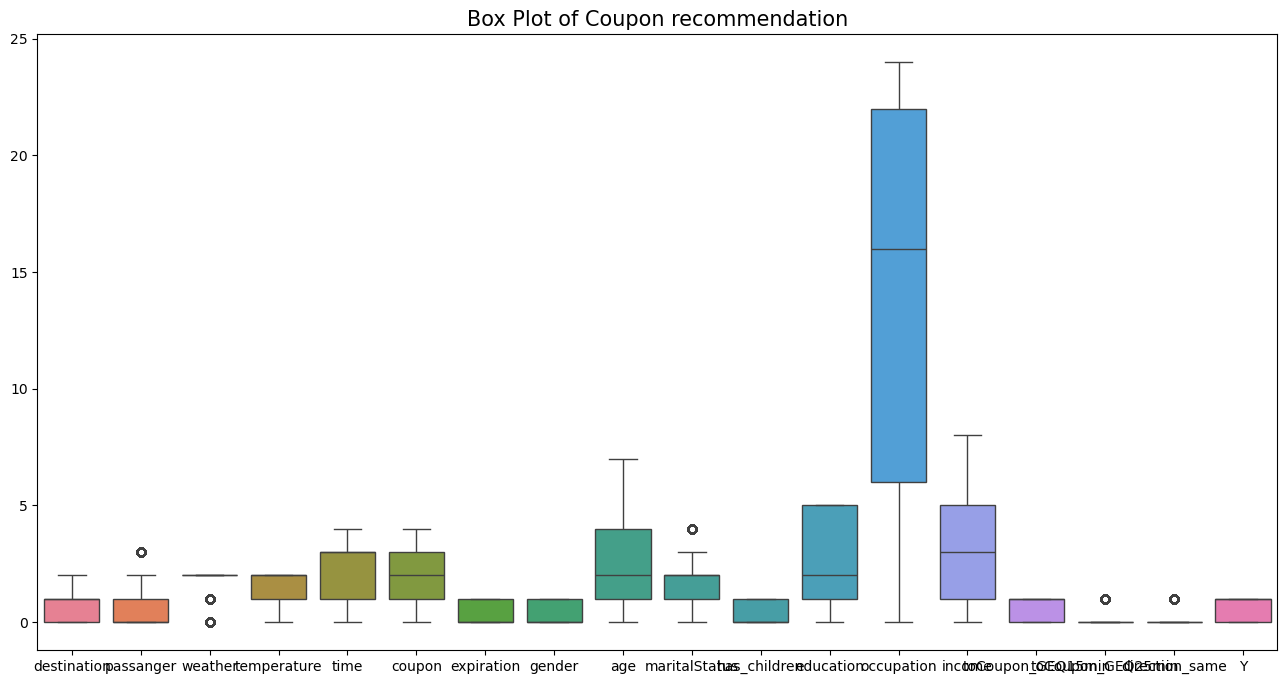

In [55]:
# outlier detection
plt.figure(figsize = (16,8))
sns.boxplot(df[numerical_features.columns])
plt.title("Box Plot of Coupon recommendation", fontsize=15)

In [57]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [59]:
df1 = Handling_Outliers(df)

<Axes: >

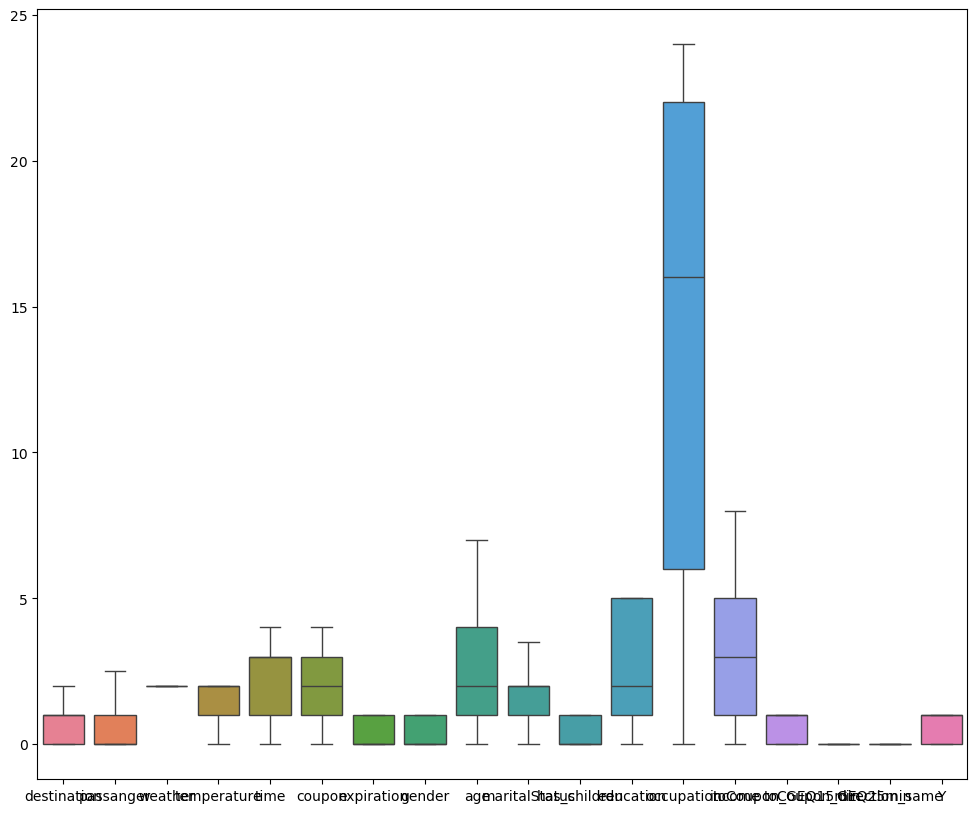

In [61]:
plt.figure(figsize = (12,10))
sns.boxplot(df1)

In [67]:
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

In [69]:
df1 = df1.drop(columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [71]:
df1.skew()

destination          0.013129
passanger            1.045069
weather              0.000000
temperature         -0.640000
time                -0.272712
coupon               0.050716
expiration           0.231863
gender               0.052046
age                  0.519014
maritalStatus        0.184863
has_children         0.347102
education            0.276123
occupation          -0.277536
income               0.453136
toCoupon_GEQ15min   -0.240933
toCoupon_GEQ25min    0.000000
direction_same       0.000000
Y                   -0.272796
dtype: float64

In [73]:
correlation=df1.corr()
correlation

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
destination,1.000000,-0.111683,NaN,-0.032057,0.408021,-0.009177,-0.028068,0.007940,-0.001852,0.002639,-0.004974,0.009344,-0.008908,-0.015102,0.136935,NaN,NaN,-0.003648
passanger,-0.111683,1.000000,NaN,0.066931,-0.414713,0.021507,0.078375,-0.024234,0.010116,-0.035634,0.063703,-0.003656,-0.063904,-0.001249,0.086192,NaN,NaN,0.055497
weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,-0.032057,0.066931,NaN,1.000000,-0.063353,0.131240,0.127774,-0.025010,-0.027112,0.004017,-0.018599,0.016472,0.005038,-0.025535,-0.157089,NaN,NaN,0.059393
time,0.408021,-0.414713,NaN,-0.063353,1.000000,0.049971,-0.081604,-0.003386,-0.008422,0.004887,-0.006602,-0.001993,0.011245,-0.007785,0.003963,NaN,NaN,-0.048846
coupon,-0.009177,0.021507,NaN,0.131240,0.049971,1.000000,0.147022,0.007158,0.002654,-0.000132,-0.010822,-0.001370,-0.001202,0.001963,-0.129636,NaN,NaN,0.099183
expiration,-0.028068,0.078375,NaN,0.127774,-0.081604,0.147022,1.000000,-0.001898,0.006406,-0.012078,0.015050,-0.009639,-0.017433,-0.010902,0.045644,NaN,NaN,-0.128737
gender,0.007940,-0.024234,NaN,-0.025010,-0.003386,0.007158,-0.001898,1.000000,-0.062229,0.060638,-0.162807,0.017116,-0.016868,0.023307,-0.006614,NaN,NaN,0.043740
age,-0.001852,0.010116,NaN,-0.027112,-0.008422,0.002654,0.006406,-0.062229,1.000000,-0.188957,0.305735,0.087845,-0.016470,0.046054,0.026566,NaN,NaN,-0.036429
maritalStatus,0.002639,-0.035634,NaN,0.004017,0.004887,-0.000132,-0.012078,0.060638,-0.188957,1.000000,-0.443981,0.067938,0.145157,0.071862,-0.049655,NaN,NaN,0.026844


Text(0.5, 1.0, 'correlation of vechicle coupon recommendation')

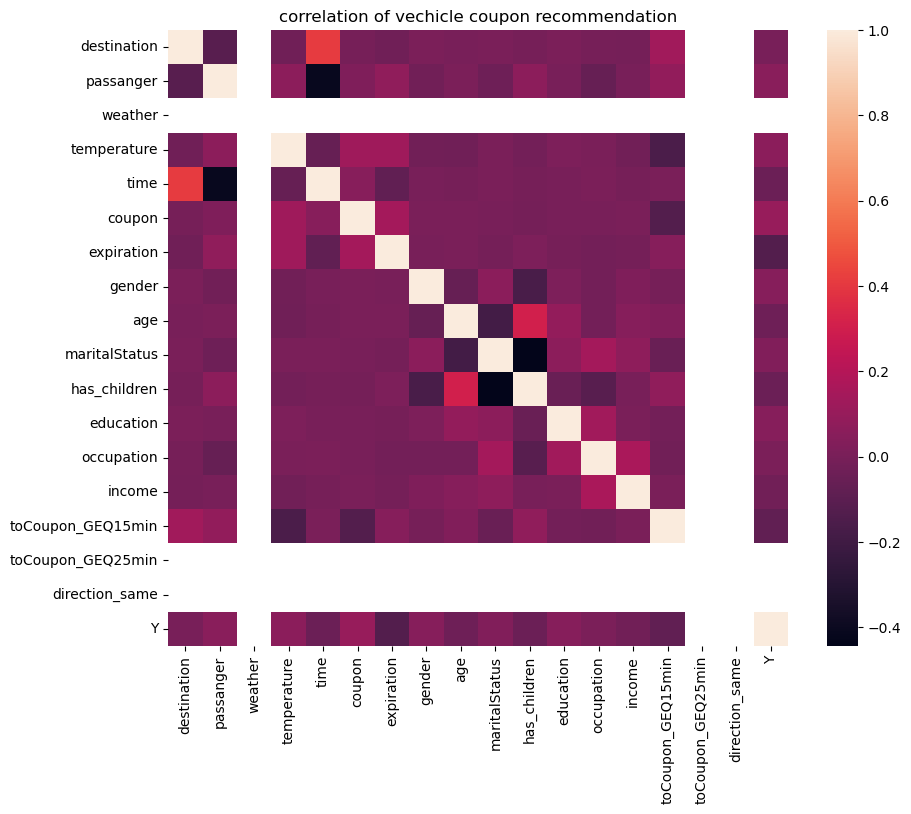

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation)
plt.title('correlation of vechicle coupon recommendation')

# Feature Selection

In [77]:
X = df1.drop(['Y'], axis = 1)
y = df1['Y']

In [79]:
sk =  SelectKBest(score_func = f_classif, k = 10)
x_new = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['passanger', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'toCoupon_GEQ15min'],
      dtype='object')

Feature Score:
              feature       Score
6          expiration  212.477933
5              coupon  125.260529
14  toCoupon_GEQ15min   86.808370
3         temperature   44.631892
1           passanger   38.951367
4                time   30.153213
10       has_children   25.647051
7              gender   24.168192
11          education   23.595580
8                 age   16.754030
9       maritalStatus    9.091939
13             income    7.634258
12         occupation    0.767324
0         destination    0.167773
2             weather         NaN
15  toCoupon_GEQ25min         NaN
16     direction_same         NaN


In [81]:
X_selected = X[selected_features]

In [83]:
X_selected.columns

Index(['passanger', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'toCoupon_GEQ15min'],
      dtype='object')

In [87]:
X_selected.head()

,passanger,temperature,time,coupon,expiration,gender,age,has_children,education,toCoupon_GEQ15min
0,0.0,1,2,4,0,0,0,1,5,0
1,1.0,2,0,2,1,0,0,1,5,0
2,1.0,2,0,1,1,0,0,1,5,1
3,1.0,2,2,2,1,0,0,1,5,1
4,1.0,2,2,2,0,0,0,1,5,1


# Scalling

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

# Train Test Split

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

In [93]:
x_train.shape

(10088, 17)

In [95]:
x_test.shape

(2522, 17)

In [97]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (10088, 17)
X_test shape : (2522, 17)
y_train shape : (10088,)
y_test shape : (2522,) 

